1. Ön işleme yapılmış veriyi okuma

In [229]:
import pandas as pd
from sklearn.model_selection import train_test_split

file_path = "datasets/processed_thyroid_cancer_data.csv"
df = pd.read_csv(file_path)

print("Veri Seti Genel Bilgileri:")
print(df.info())

print("\nİlk 5 Satır:")
print(df.head())

Veri Seti Genel Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  212691 non-null  float64
 1   Gender               212691 non-null  int64  
 2   Country              212691 non-null  int64  
 3   Ethnicity            212691 non-null  int64  
 4   Family_History       212691 non-null  int64  
 5   Radiation_Exposure   212691 non-null  int64  
 6   Iodine_Deficiency    212691 non-null  int64  
 7   Smoking              212691 non-null  int64  
 8   Obesity              212691 non-null  int64  
 9   Diabetes             212691 non-null  int64  
 10  TSH_Level            212691 non-null  float64
 11  T3_Level             212691 non-null  float64
 12  T4_Level             212691 non-null  float64
 13  Nodule_Size          212691 non-null  float64
 14  Thyroid_Cancer_Risk  212691 non-null  int

2. Bağımlı ve Bağımsız değişkenleri ayırma

In [230]:
from sklearn.model_selection import train_test_split

# Bağımlı (hedef) değişkeni belirleyelim
target_column = "Thyroid_Cancer_Risk"

# Bağımsız değişkenler (X) ve bağımlı değişken (y) ayıralım
X = df.drop(columns=[target_column])  # Bağımsız değişkenler
y = df[target_column]  # Bağımlı değişken

# Veriyi eğitim (%80) ve test (%20) olarak bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Veri boyutlarını kontrol edelim
print("Eğitim Verisi:", X_train.shape, y_train.shape)
print("Test Verisi:", X_test.shape, y_test.shape)

Eğitim Verisi: (170152, 15) (170152,)
Test Verisi: (42539, 15) (42539,)


In [231]:
from imblearn.over_sampling import SMOTE
import numpy as np

# SMOTE ile veri dengeleme
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Yeni veri setinin sınıf dağılımını kontrol edelim
unique, counts = np.unique(y_train_balanced, return_counts=True)
print("Yeni sınıf dağılımı:", dict(zip(unique, counts)))

Yeni sınıf dağılımı: {0: 86710, 1: 86710, 2: 86710}


In [232]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(X_train_balanced, y_train_balanced)

y_pred = nb_model.predict(X_test)

# İlk 10 tahmini görüntüleme
print("İlk 10 Tahmin Sonucu:", y_pred[:10])

İlk 10 Tahmin Sonucu: [1 1 1 0 0 2 0 2 2 2]


3. Naif Bayes model eğitimi

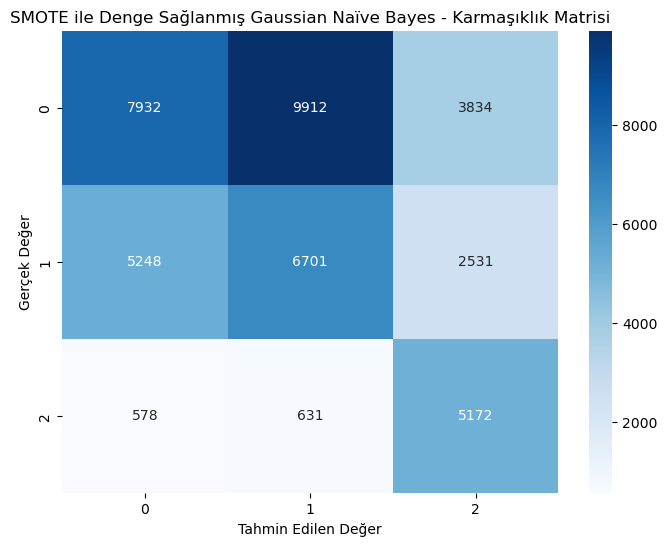

In [233]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Tahmin Edilen Değer")
plt.ylabel("Gerçek Değer")
plt.title("SMOTE ile Denge Sağlanmış Gaussian Naïve Bayes - Karmaşıklık Matrisi")
plt.show()

In [234]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

conf_matrix = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

precision_per_class = precision_score(y_test, y_pred, average=None)

recall_per_class = recall_score(y_test, y_pred, average=None)

f1_per_class = f1_score(y_test, y_pred, average=None)

specificity_per_class = []
for i in range(conf_matrix.shape[0]):
    tn = np.sum(conf_matrix) - np.sum(conf_matrix[i, :]) - np.sum(conf_matrix[:, i]) + conf_matrix[i, i]
    fp = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
    specificity_per_class.append(tn / (tn + fp))

print(f"Doğruluk (Accuracy): {accuracy:.4f}")

for i in range(len(precision_per_class)):
    print("-" * 40)
    print(f"Sınıf {i} Kesinlik (Precision): {precision_per_class[i]:.4f}")
    print(f"Sınıf {i} Duyarlılık (Recall): {recall_per_class[i]:.4f}")
    print(f"Sınıf {i} F1 Skoru: {f1_per_class[i]:.4f}")
    print(f"Sınıf {i} Özgünlük (Specificity): {specificity_per_class[i]:.4f}")

Doğruluk (Accuracy): 0.4656
----------------------------------------
Sınıf 0 Kesinlik (Precision): 0.5765
Sınıf 0 Duyarlılık (Recall): 0.3659
Sınıf 0 F1 Skoru: 0.4477
Sınıf 0 Özgünlük (Specificity): 0.7207
----------------------------------------
Sınıf 1 Kesinlik (Precision): 0.3886
Sınıf 1 Duyarlılık (Recall): 0.4628
Sınıf 1 F1 Skoru: 0.4225
Sınıf 1 Özgünlük (Specificity): 0.6243
----------------------------------------
Sınıf 2 Kesinlik (Precision): 0.4483
Sınıf 2 Duyarlılık (Recall): 0.8105
Sınıf 2 F1 Skoru: 0.5773
Sınıf 2 Özgünlük (Specificity): 0.8240


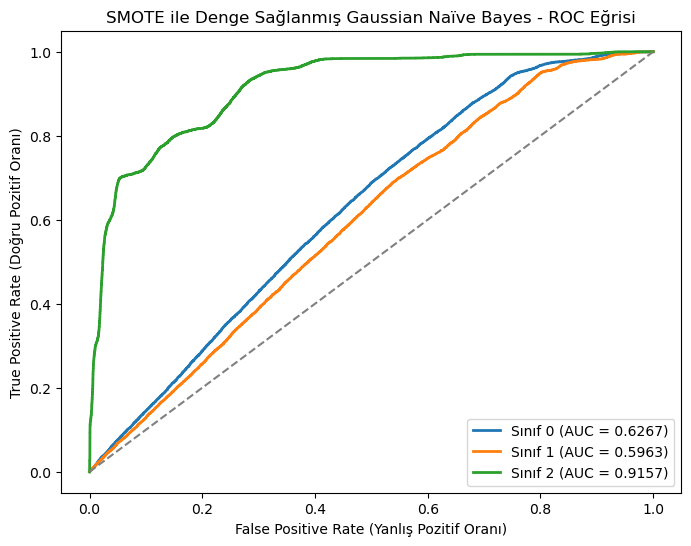

In [235]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_pred_prob = nb_model.predict_proba(X_test) 

# ROC eğrisi
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Sınıf {classes[i]} (AUC = {roc_auc:.4f})")

plt.plot([0, 1], [0, 1], color="gray", linestyle="--")

plt.xlabel("False Positive Rate (Yanlış Pozitif Oranı)")
plt.ylabel("True Positive Rate (Doğru Pozitif Oranı)")
plt.title("SMOTE ile Denge Sağlanmış Gaussian Naïve Bayes - ROC Eğrisi")
plt.legend(loc="lower right")
plt.show()